In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import html
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import string 
import unicodedata
from nltk.tokenize import word_tokenize
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

C:\Users\KIROO\AppData\Local\Temp\ipykernel_11664\66824560.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')


In [3]:
df.shape

(5572, 5)

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.duplicated().sum()

403

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(5169, 5)

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5126
Unnamed: 3    5159
Unnamed: 4    5164
dtype: int64

In [9]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [10]:
# to covert object to int
df.replace({'v1':{'ham':1,'spam':0}},inplace=True)

C:\Users\KIROO\AppData\Local\Temp\ipykernel_11664\3952817871.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'v1':{'ham':1,'spam':0}},inplace=True)


In [11]:
df['v1'].head()

0    1
1    1
2    0
3    1
4    1
Name: v1, dtype: int64

## drop this columns contain null values very much

In [12]:

df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [13]:
df.columns

Index(['v1', 'v2'], dtype='object')

In [14]:
df['v1'].value_counts()

v1
1    4516
0     653
Name: count, dtype: int64

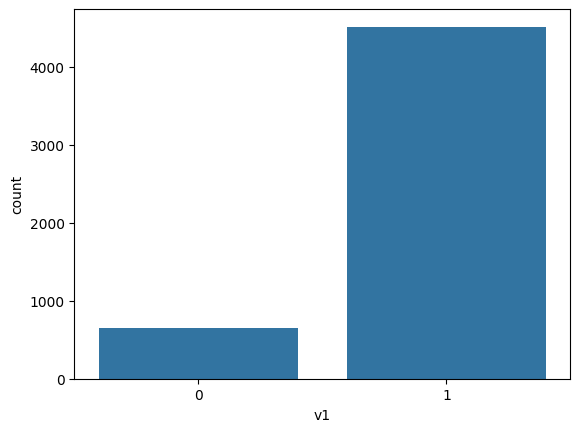

In [15]:
sns.countplot(data=df,x='v1')
plt.show()


### Now work on column 'v2'  

In [16]:
def remove_special_chars(text):
    re1 = re.compile(r'  +')
    x1 = text.lower().replace('#39;', "'").replace('amp;', '&').replace('#146;', "'").replace(
        'nbsp;', ' ').replace('#36;', '$').replace('\\n', "\n").replace('quot;', "'").replace(
        '<br />', "\n").replace('\\"', '"').replace('<unk>', 'u_n').replace(' @.@ ', '.').replace(
        ' @-@ ', '-').replace('\\', ' \\ ')
    return re1.sub(' ', html.unescape(x1))


def remove_non_ascii(text):
    """Remove non-ASCII characters from list of tokenized words"""
    return unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')


def to_lowercase(text):
    return text.lower()



def remove_punctuation(text):
    """Remove punctuation from list of tokenized words"""
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)


def replace_numbers(text):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    return re.sub(r'\d+', '', text)


def remove_whitespaces(text):
    return text.strip()


def remove_stopwords(words):
    stop_words = set(stopwords.words('english'))
    return [word for word in words if word not in stop_words]


def stem_words(words):
    """Stem words in text"""
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in words]

# # def lemmatize_words(words):
# #     """Lemmatize words in text"""

# #     lemmatizer = WordNetLemmatizer()
# #     return [lemmatizer.lemmatize(word) for word in words]

# def lemmatize_verbs(words):
#     """Lemmatize verbs in text"""

#     lemmatizer = WordNetLemmatizer()
#     return ' '.join([lemmatizer.lemmatize(word, pos='v') for word in words])

def text2words(text):
  return word_tokenize(text)

def normalize_text( text):
    text = remove_special_chars(text)
    text = remove_non_ascii(text)
    text = remove_punctuation(text)
    text = to_lowercase(text)
    text = replace_numbers(text)
    words = text2words(text)
    words = remove_stopwords(words)
    words = stem_words(words)# Either stem ovocar lemmatize
    # words = lemmatize_words(words)
    # words = lemmatize_verbs(words)

    return ''.join(words)

In [17]:
normalize_text(df['v2'][0])

'gojurongpointcraziavailbugingreatworldlaebuffetcinegotamorwat'

#### Tokenizer

In [18]:


tok = Tokenizer()
tok.fit_on_texts(df['v2'] )
df['v2'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [19]:

# بياخد الكلمات الفريده ويعطيها ارقاام لتسهل مع الموديل الفهم
tok.word_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'call': 17,
 'that': 18,
 'on': 19,
 '2': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'at': 27,
 'or': 28,
 "i'm": 29,
 'do': 30,
 'be': 31,
 'get': 32,
 'will': 33,
 'just': 34,
 'if': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 'gt': 42,
 'lt': 43,
 '4': 44,
 'how': 45,
 'when': 46,
 'go': 47,
 'from': 48,
 'ok': 49,
 'out': 50,
 'all': 51,
 'what': 52,
 'free': 53,
 'know': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'come': 59,
 'am': 60,
 'was': 61,
 'time': 62,
 'its': 63,
 'only': 64,
 'day': 65,
 'want': 66,
 'love': 67,
 'there': 68,
 'he': 69,
 'text': 70,
 'send': 71,
 'going': 72,
 'one': 73,
 'need': 74,
 'by': 75,
 'lor': 76,
 'home': 77,
 'as': 78,
 'about': 79,
 'still': 80,
 'see': 81,
 'txt': 82,
 'back': 83,
 'r': 84,
 'sto

In [20]:
sequences=tok.texts_to_sequences(df['v2'])
sequences

[[47,
  433,
  4013,
  780,
  705,
  662,
  64,
  8,
  1202,
  94,
  121,
  434,
  1203,
  142,
  2712,
  1204,
  68,
  57,
  4014,
  137],
 [49, 306, 1364, 435, 6, 1767],
 [53,
  537,
  8,
  20,
  4,
  1016,
  934,
  2,
  220,
  2713,
  1365,
  706,
  2714,
  2715,
  267,
  2716,
  70,
  2713,
  2,
  2717,
  2,
  359,
  537,
  604,
  1205,
  82,
  436,
  185,
  707,
  437,
  4015],
 [6, 226, 152, 23, 347, 2718, 6, 138, 145, 56, 152],
 [935, 1, 97, 96, 69, 453, 2, 877, 69, 1768, 198, 105, 438],
 [738,
  113,
  68,
  1534,
  141,
  108,
  168,
  2104,
  22,
  7,
  38,
  348,
  83,
  828,
  55,
  110,
  391,
  3,
  41,
  12,
  14,
  80,
  1769,
  49,
  360,
  1205,
  4016,
  2,
  71,
  349,
  258,
  2,
  2719],
 [221, 11, 631, 9, 25, 55, 2, 392, 36, 10, 109, 663, 10, 55, 4017, 4018],
 [78,
  247,
  13,
  1535,
  4019,
  4020,
  2720,
  4021,
  4022,
  4023,
  1206,
  125,
  108,
  632,
  78,
  13,
  1770,
  12,
  51,
  2721,
  1207,
  468,
  2,
  1366,
  13,
  282,
  1770],
 [781,
  78,


#### Padding

In [21]:

maxlen = max([len(t) for t in df['v2']])

l = np.array(pad_sequences(sequences,
                          maxlen=maxlen,
                          padding='post',))
l

array([[  47,  433, 4013, ...,    0,    0,    0],
       [  49,  306, 1364, ...,    0,    0,    0],
       [  53,  537,    8, ...,    0,    0,    0],
       ...,
       [8918,   61,    8, ...,    0,    0,    0],
       [   5,  499,  111, ...,    0,    0,    0],
       [2432,   63,  533, ...,    0,    0,    0]])

### TF_IDF convert text to numbers 

In [22]:


vectorizer = TfidfVectorizer()
tfidf=vectorizer.fit_transform(df['v2'])
tfidf.toarray()


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
tfidf.toarray().shape

(5169, 8672)

In [24]:
X=tfidf.toarray()
y=df['v1']

In [25]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [26]:

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=.4)

In [27]:
print("X_train  ",X_train.shape)
print("y_train  ",y_train.shape)
print("X_test   ",X_test.shape)
print("y_test   " ,y_test.shape)

X_train   (3101, 8672)
y_train   (3101,)
X_test    (2068, 8672)
y_test    (2068,)


In [28]:

tree = ExtraTreesClassifier(max_depth=12, n_estimators=110, random_state=0)
tree.fit(X_train, y_train)

ExtraTreesClassifier(max_depth=12, n_estimators=110, random_state=0)

In [29]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

0.9026120606256046
0.8849129593810445


In [30]:
y_pred=tree.predict(X_test)

In [31]:

accuracy=confusion_matrix(y_test, y_pred)
print(accuracy)

[[  38  238]
 [   0 1792]]


In [32]:


f1=f1_score(y_test, y_pred)
print("accuarcy :",f1)


accuarcy : 0.9377289377289377
